In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import requests
import pickle

import pandas as pd
from sklearn.model_selection import train_test_split

from atml import AtmlController

%load_ext autoreload
%autoreload 2

# 1. The Problem

### The Framework/SDK should be able to address the following 2 problems:

### 2.1 Given a new dataset, how do I quickly and conveniently come up with a satisfactory baseline model?
### 2.2 Can I have a framework that help me pick the best combination from the various candidates of Feature Enigneering, Model and Parameters?

# 2. Preparation

In [3]:
df = pd.read_csv("../test/data/binary_data.csv")
X = df.drop('Survived', axis=1)

label_columns = ['Survived']
y = df[label_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

# 3. The Design

### 3.1 Analogy with Eletricity System
* Modular and Pluggable Design
<br><br>
* Program = Control + Logic + Data
<br><br>
* Best practice is to seperate <b>Control</b>, <b>Logic</b> and <b>Data</b> for Extensibility and Maintainability
<br><br>
* <b>Control</b> does not change. It consists of AutoController and 3 kinds of Sockets
<br><br>
    * AutoController chain the 3 Sockets (AFS, ALS an ADS) together
    * Each Socket provide an plugging point for Plug instance and chain the plugs together
<br><br>
* <b>Logic</b> refer to the Plug instances to respective Socket. It will change frequently and is controlled by User
<br><br>
    * User have the flexibilty of decide whatever feature Eningineeing algorithms, whatever models to tune, whereever to deploy
    * Sensible defaults are provided if user does not provide anything

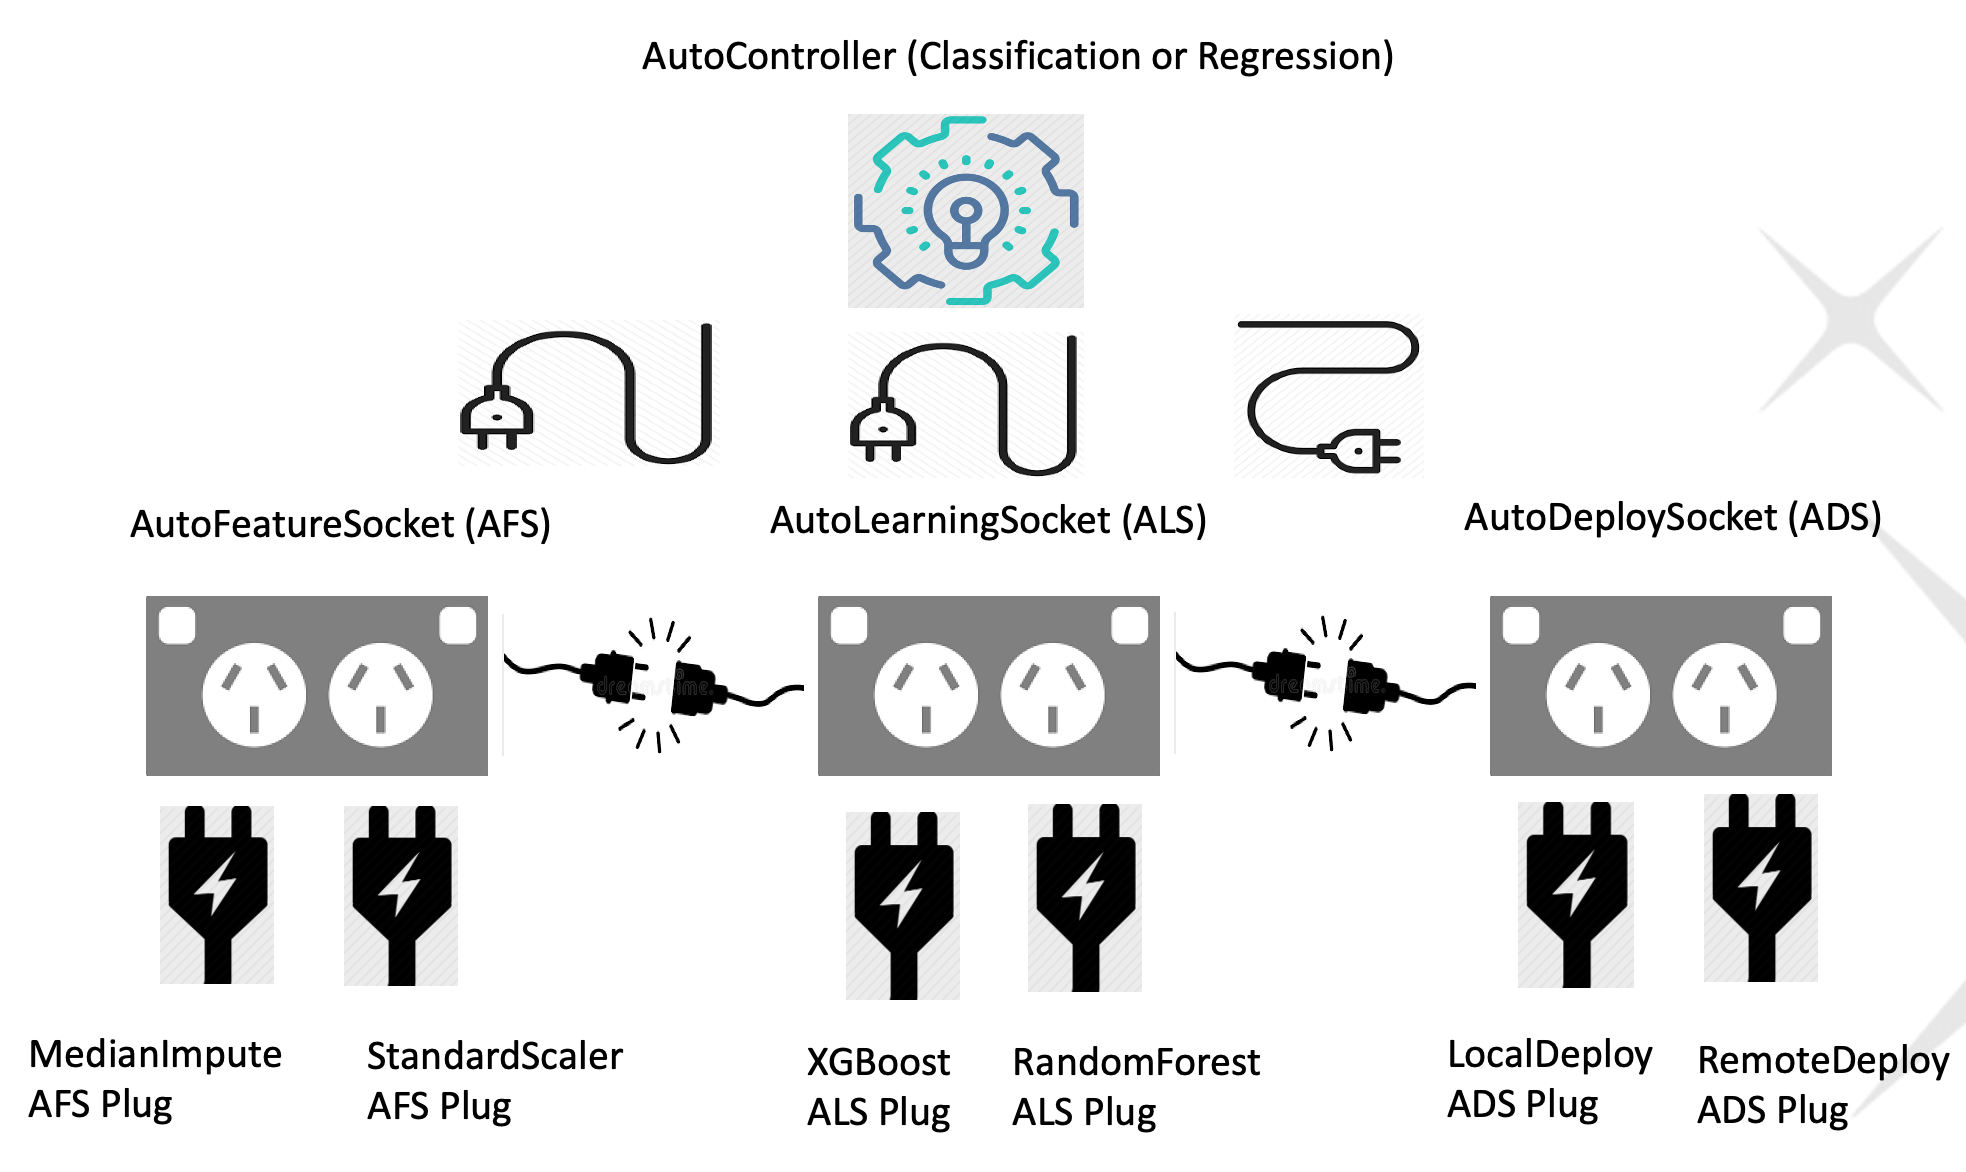

In [4]:
from IPython.display import Image
Image(filename='atml_design.png')

# 4. Examples

## 4.1 Quickly and conveniently come up with a satisfactory baseline model

* User just needs to provide training data
* Hyperparameter Tuning backed by NNI
* All 3 stages, Feature Enigneering, Tuning and Deploy, have been exeucted by a Single Call
* All in Python

In [5]:
controller = AtmlController(with_default=True)

[I 200619 20:35:32 base_socket:23] Registered plug <class 'sklearn.impute._base.SimpleImputer'> in Socket AutoNumericFeatureSocket
[I 200619 20:35:32 base_socket:23] Registered plug <class 'sklearn.preprocessing.data.StandardScaler'> in Socket AutoNumericFeatureSocket
[I 200619 20:35:32 base_socket:23] Registered plug <class 'sklearn.impute._base.SimpleImputer'> in Socket AutoCategoricalFeatureSocket
[I 200619 20:35:32 base_socket:23] Registered plug <class 'sklearn.preprocessing._encoders.OneHotEncoder'> in Socket AutoCategoricalFeatureSocket
[I 200619 20:35:32 auto_learning_socket:10] with_default: True
[I 200619 20:35:32 atml_impl:23] run_id: 20200619203532
[I 200619 20:35:32 atml_impl:24] run_dir: C:\Users\Admin\nni\runs\20200619203532
[I 200619 20:35:32 atml_impl:25] with_default: True
[I 200619 20:35:32 model_repo_manager:16] with_default: True
[D 200619 20:35:32 nni_exec_manager:23] Default NNI Execution Config: {'base_port': '8080', 'concurrency': '8', 'max_duration': '30s', 'm

#### Simply calling build function to do Feature Engineering, Model Selction and Tuning as well as Local Deployment 

In [6]:
controller.build(X_train, y_train)

[I 200619 20:35:32 controller:23] **Start running Auto Feature Socket**
[I 200619 20:35:32 controller:26] **End of Auto Feature Socket**
[I 200619 20:35:32 controller:28] **Start running Auto Learning Socket**
[I 200619 20:35:36 nni_exec_manager:50] Starting Hyperparameter Tuning with sklearn.ensemble.forest.RandomForestClassifier
[I 200619 20:35:47 nni_exec_manager:100] http://localhost:8080 for sklearn.ensemble.forest.RandomForestClassifier Started


Experiment finished. 7 seconds taken. Number of trials succeeded: 7


[I 200619 20:36:36 nni_exec_manager:100] http://localhost:8080 for sklearn.ensemble.forest.RandomForestClassifier Stopped
[I 200619 20:36:40 controller:30] **End of Auto Learning Socket**
[I 200619 20:36:40 controller:32] **Start running Auto Deploying Socket**


Inside AtmLocalDeployer with port 5000


[I 200619 20:36:43 controller:34] **End of Auto Deploying Socket with Endpoint: ['http://localhost:5000']**


In [7]:
controller.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [8]:
controller.score(X_test, y_test)

0.8295964125560538

#### Predict and Score with RESTFul API Endpoint

In [9]:
controller.predict_with_endpoint(X_test[0:5])

[I 200619 20:36:43 controller:42] Endpoint: http://localhost:5000/atml/api/v1/predict


[0, 0, 0, 1, 1]

In [10]:
controller.score_with_endpoint(X_test, y_test)

[I 200619 20:36:46 controller:54] Endpoint: http://localhost:5000/atml/api/v1/score


{'score': 0.8251121076233184}

In [11]:
url = "http://localhost:5000/atml/api/v1/predict"

data = pickle.dumps(X_test[0:5],protocol=2)

r = requests.post(url,data=data)
r.content

b'[0, 0, 0, 1, 1]'

## 4.2 Pick the best combination from the candidates of Feature Enigneering, Model and Parameters

In [12]:
controller = AtmlController(with_default=True)

[I 200619 20:36:50 base_socket:23] Registered plug <class 'sklearn.impute._base.SimpleImputer'> in Socket AutoNumericFeatureSocket
[I 200619 20:36:50 base_socket:23] Registered plug <class 'sklearn.preprocessing.data.StandardScaler'> in Socket AutoNumericFeatureSocket
[I 200619 20:36:50 base_socket:23] Registered plug <class 'sklearn.impute._base.SimpleImputer'> in Socket AutoCategoricalFeatureSocket
[I 200619 20:36:50 base_socket:23] Registered plug <class 'sklearn.preprocessing._encoders.OneHotEncoder'> in Socket AutoCategoricalFeatureSocket
[I 200619 20:36:50 auto_learning_socket:10] with_default: True
[I 200619 20:36:50 atml_impl:23] run_id: 20200619203650
[I 200619 20:36:50 atml_impl:24] run_dir: C:\Users\Admin\nni\runs\20200619203650
[I 200619 20:36:50 atml_impl:25] with_default: True
[I 200619 20:36:50 model_repo_manager:16] with_default: True
[D 200619 20:36:50 nni_exec_manager:23] Default NNI Execution Config: {'base_port': '8080', 'concurrency': '8', 'max_duration': '30s', 'm

### User decides to check whether his customized classifers with some search space could perform better
### It can be easily achieved by registering the model and search space with the AutoLearning  Socket

In [13]:
from sklearn.svm import SVC
sp = [
    {"property": "kernel", "type": "choice", "value": ["linear", "rbf"]},
    {"property": "gamma", "type": "choice", "value": ["scale", "auto"]}     
]
controller.auto_learning_socket.register(SVC(), sp)

In [14]:
controller.build(X, y)

[I 200619 20:36:50 controller:23] **Start running Auto Feature Socket**
[I 200619 20:36:50 controller:26] **End of Auto Feature Socket**
[I 200619 20:36:50 controller:28] **Start running Auto Learning Socket**
[I 200619 20:36:54 nni_exec_manager:50] Starting Hyperparameter Tuning with sklearn.ensemble.forest.RandomForestClassifier
[I 200619 20:37:05 nni_exec_manager:100] http://localhost:8080 for sklearn.ensemble.forest.RandomForestClassifier Started


Experiment finished. 7 seconds taken. Number of trials succeeded: 7


[I 200619 20:37:56 nni_exec_manager:100] http://localhost:8080 for sklearn.ensemble.forest.RandomForestClassifier Stopped
[I 200619 20:38:03 nni_exec_manager:50] Starting Hyperparameter Tuning with sklearn.svm.classes.SVC
[I 200619 20:38:13 nni_exec_manager:100] http://localhost:8080 for sklearn.svm.classes.SVC Started


Experiment finished. 4 seconds taken. Number of trials succeeded: 3


[I 200619 20:38:43 nni_exec_manager:100] http://localhost:8080 for sklearn.svm.classes.SVC Stopped
[I 200619 20:38:47 controller:30] **End of Auto Learning Socket**
[I 200619 20:38:47 controller:32] **Start running Auto Deploying Socket**


Inside AtmLocalDeployer with port 5000


[I 200619 20:38:51 controller:34] **End of Auto Deploying Socket with Endpoint: ['http://localhost:5000']**


In [15]:
controller.score(X_test, y_test)

0.9641255605381166

#### Retrieve the best model for local prediction or other purpose

In [16]:
controller.auto_learning_socket.best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)